In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pylab as plt
import matplotlib.dates as mdates

import seaborn as sns

In [4]:
train = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/sales_train.csv')
print ('number of shops: ', train['shop_id'].max())
print ('number of items: ', train['item_id'].max())
num_month = train['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', train.shape)
train.head()

number of shops:  59
number of items:  22168
number of month:  10
size of train:  (1048575, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1


In [5]:
test = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/test.csv')
test.head()


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
sub = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/sample_submission.csv')
sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [7]:
items = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/items.csv')
print ('number of categories: ', items['item_category_id'].max()) # the maximun number of category id
items.head()

number of categories:  83


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
train_clean=train.drop(labels=['date','item_price'],axis=1)
train_clean.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1
1,0,25,2552,1
2,0,25,2552,-1
3,0,25,2554,1
4,0,25,2555,1


In [9]:
train_clean = train_clean.groupby(["item_id","shop_id","date_block_num"]).sum().reset_index()
train_clean = train_clean.rename(index=str, columns = {"item_cnt_day":"item_cnt_month"})
train_clean = train_clean[["item_id","shop_id","date_block_num","item_cnt_month"]]
train_clean

,item_id,shop_id,date_block_num,item_cnt_month
0,12,54,1,1
1,19,25,0,1
2,27,1,0,1
3,27,2,0,1
4,27,5,7,1
5,27,7,9,1
6,27,10,0,1
7,27,10,9,1
8,27,14,3,1
9,27,14,9,1


In [10]:
check = train_clean[["shop_id","item_id","date_block_num","item_cnt_month"]]
check = check.loc[check['shop_id'] == 5]
check = check.loc[check['item_id'] == 5037]
check

,shop_id,item_id,date_block_num,item_cnt_month


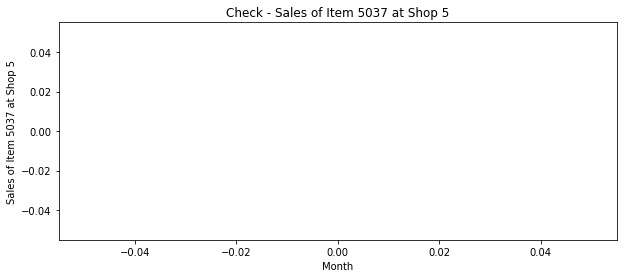

In [11]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(check["date_block_num"],check["item_cnt_month"]);

In [12]:
month_list=[i for i in range(num_month+1)]
shop = []
for i in range(num_month+1):
    shop.append(5)
item = []
for i in range(num_month+1):
    item.append(5037)
months_full = pd.DataFrame({'shop_id':shop, 'item_id':item,'date_block_num':month_list})
months_full

,date_block_num,item_id,shop_id
0,0,5037,5
1,1,5037,5
2,2,5037,5
3,3,5037,5
4,4,5037,5
5,5,5037,5
6,6,5037,5
7,7,5037,5
8,8,5037,5
9,9,5037,5


In [13]:
sales_33month = pd.merge(check, months_full, how='right', on=['shop_id','item_id','date_block_num'])
sales_33month = sales_33month.sort_values(by=['date_block_num'])
sales_33month.fillna(0.00,inplace=True)
sales_33month

,item_cnt_month,date_block_num,item_id,shop_id
0,0.0,0,5037,5
1,0.0,1,5037,5
2,0.0,2,5037,5
3,0.0,3,5037,5
4,0.0,4,5037,5
5,0.0,5,5037,5
6,0.0,6,5037,5
7,0.0,7,5037,5
8,0.0,8,5037,5
9,0.0,9,5037,5


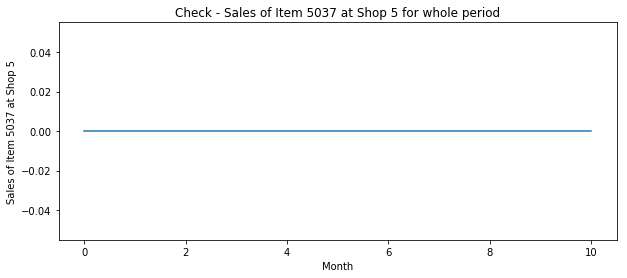

In [14]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5 for whole period')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(sales_33month["date_block_num"],sales_33month["item_cnt_month"]);

In [15]:
for i in range(1,6):
    sales_33month["T_" + str(i)] = sales_33month.item_cnt_month.shift(i)
sales_33month.fillna(0.0, inplace=True)
sales_33month

,item_cnt_month,date_block_num,item_id,shop_id,T_1,T_2,T_3,T_4,T_5
0,0.0,0,5037,5,0.0,0.0,0.0,0.0,0.0
1,0.0,1,5037,5,0.0,0.0,0.0,0.0,0.0
2,0.0,2,5037,5,0.0,0.0,0.0,0.0,0.0
3,0.0,3,5037,5,0.0,0.0,0.0,0.0,0.0
4,0.0,4,5037,5,0.0,0.0,0.0,0.0,0.0
5,0.0,5,5037,5,0.0,0.0,0.0,0.0,0.0
6,0.0,6,5037,5,0.0,0.0,0.0,0.0,0.0
7,0.0,7,5037,5,0.0,0.0,0.0,0.0,0.0
8,0.0,8,5037,5,0.0,0.0,0.0,0.0,0.0
9,0.0,9,5037,5,0.0,0.0,0.0,0.0,0.0


In [16]:
df = sales_33month[['shop_id','item_id','date_block_num','T_1','T_2','T_3','T_4','T_5', 'item_cnt_month']].reset_index()
df = df.drop(labels = ['index'], axis = 1)
df

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5,item_cnt_month
0,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0,0.0
5,5,5037,5,0.0,0.0,0.0,0.0,0.0,0.0
6,5,5037,6,0.0,0.0,0.0,0.0,0.0,0.0
7,5,5037,7,0.0,0.0,0.0,0.0,0.0,0.0
8,5,5037,8,0.0,0.0,0.0,0.0,0.0,0.0
9,5,5037,9,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
train_df = df[:-3]
val_df = df[-3:]
x_train,y_train = train_df.drop(["item_cnt_month"],axis=1),train_df.item_cnt_month
x_val,y_val = val_df.drop(["item_cnt_month"],axis=1),val_df.item_cnt_month

In [18]:
x_train

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5
0,5,5037,0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0
5,5,5037,5,0.0,0.0,0.0,0.0,0.0
6,5,5037,6,0.0,0.0,0.0,0.0,0.0
7,5,5037,7,0.0,0.0,0.0,0.0,0.0


In [19]:
y_train

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: item_cnt_month, dtype: float64

In [20]:
x_val


,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5
8,5,5037,8,0.0,0.0,0.0,0.0,0.0
9,5,5037,9,0.0,0.0,0.0,0.0,0.0
10,5,5037,10,0.0,0.0,0.0,0.0,0.0


In [21]:
y_val


8     0.0
9     0.0
10    0.0
Name: item_cnt_month, dtype: float64

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(15, input_shape=(1,8)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_val)

In [24]:
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_val_resaped = x_valid_scaled.reshape((x_valid_scaled.shape[0], 1, x_valid_scaled.shape[1]))

In [25]:
history = model_lstm.fit(x_train_reshaped, y_train, validation_data=(x_val_resaped, y_val),epochs=70, batch_size=12, verbose=2, shuffle=False)
y_pre = model_lstm.predict(x_val_resaped)

Train on 8 samples, validate on 3 samples
Epoch 1/70
 - 1s - loss: 0.1427 - acc: 1.0000 - val_loss: 0.1324 - val_acc: 1.0000
Epoch 2/70
 - 0s - loss: 0.1323 - acc: 1.0000 - val_loss: 0.1225 - val_acc: 1.0000
Epoch 3/70
 - 0s - loss: 0.1224 - acc: 1.0000 - val_loss: 0.1131 - val_acc: 1.0000
Epoch 4/70
 - 0s - loss: 0.1129 - acc: 1.0000 - val_loss: 0.1041 - val_acc: 1.0000
Epoch 5/70
 - 0s - loss: 0.1039 - acc: 1.0000 - val_loss: 0.0955 - val_acc: 1.0000
Epoch 6/70
 - 0s - loss: 0.0954 - acc: 1.0000 - val_loss: 0.0874 - val_acc: 1.0000
Epoch 7/70
 - 0s - loss: 0.0872 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 1.0000
Epoch 8/70
 - 0s - loss: 0.0796 - acc: 1.0000 - val_loss: 0.0726 - val_acc: 1.0000
Epoch 9/70
 - 0s - loss: 0.0723 - acc: 1.0000 - val_loss: 0.0658 - val_acc: 1.0000
Epoch 10/70
 - 0s - loss: 0.0655 - acc: 1.0000 - val_loss: 0.0594 - val_acc: 1.0000
Epoch 11/70
 - 0s - loss: 0.0591 - acc: 1.0000 - val_loss: 0.0535 - val_acc: 1.0000
Epoch 12/70
 - 0s - loss: 0.0531 - acc: 1.0

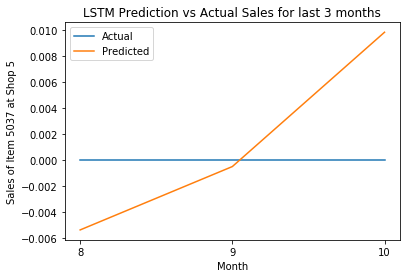

In [26]:
fig, ax = plt.subplots()
ax.plot(x_val['date_block_num'], y_val, label='Actual')
ax.plot(x_val['date_block_num'], y_pre, label='Predicted')
plt.title('LSTM Prediction vs Actual Sales for last 3 months')
plt.xlabel('Month')
plt.xticks(x_val['date_block_num'])
plt.ylabel('Sales of Item 5037 at Shop 5')
ax.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_val,y_pre))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 0.006
